# Algothon 2019

In [1]:
! pip install quandl
! pip install pyodbc

You are using pip version 9.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [70]:
import pandas as pd
import pyodbc
import os
import numpy as np
import quandl
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML, display
import time


In [3]:
username='stg-3bd6beaa-1379-585f-b0a0-efee0c82a5fa' # your personal credentials for Data Science Accelerator access to QA Direct
password='EeW3f(CcNVn4]KpRUd8l' # your personal credentials for Data Science Accelerator access to QA Direct
server = 'dsa-qa.database.windows.net'
database = 'dsa-qa'
driver='/usr/local/lib/libmsodbcsql.17.dylib'
cnxn = pyodbc.connect('DRIVER='+driver+';SERVER='+server+';PORT=1433;DATABASE='+database+';UID='+username+';PWD='+ password)

In [4]:
 quandl.ApiConfig.api_key = 'p4jcoqStYDsk4iqVZz1U'

In [5]:
relationData = pd.read_csv('Quandl relationship.csv')
relationData.shape

/Applications/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(3698248, 17)

In [6]:
ISINRelation = relationData[['supplier_isin', 'supplier_name', 'customer_isin', 'customer_name']]
ISINRelation = ISINRelation.drop_duplicates()

In [7]:
N = 100000
TEST = ISINRelation.head(N)
#df1 = TEST[['supplier_isin', 'supplier_name']]
#df2 = TEST[['customer_isin', 'customer_name']]

#for index, row in df2.iterrows():
    #print(row['customer_isin'], row['customer_name'])
  #  rowdf = pd.DataFrame(row)
   # print(rowdf.columns)
   # df1 = df1.append(row)
    
    #£df1.append(x)
#TEST = pd.DataFrame(df1)
#print(df1.shape)

TESTarr = np.asarray(TEST)
TESTarr = np.reshape(TESTarr, (2*N,2))
TEST = pd.DataFrame(TESTarr).drop_duplicates().values

TEST.shape

#TESTarr = pd.DataFrame(TESTarr)
#TEST = TESTarr
#TEST.columns = ['supplier_isin', 'supplier_name']

(39662, 2)

In [8]:
def HIDMatch(name):
    sql_qry = """
    SELECT 
        top(10) ri.OrgId, ComName, ra.TRBCId, HierarchicalId
    FROM
        RDCOrgInfo ri JOIN RDCTRBCData ra ON ri.OrgId = ra.OrgId JOIN RDCTRBCInfo rii ON ra.TRBCId = rii.TRBCId
        
    WHERE 
        CHARINDEX('"""+ name +'\', ComName) > 0'
    
    df = pd.read_sql(sql_qry, cnxn)
    if len(df) != 0:
        HIDFull = str((df['HierarchicalId'][0]))
        HID = int(HIDFull[0:2])
        return(HID)
    else:
        return(-1)

In [9]:
HID = []
name_done = []
i = 1
for z, x in TEST:
    name = x.split(' ', 1)[0]
    name = ''.join(e for e in name if e.isalnum())
    print(i/len(TEST)*100, '%')
    if name not in name_done:  
        y = HIDMatch(name)
        if y != -1:        
            HID.append([y,x,z])
            name_done.append(name)
            HIDDF = pd.DataFrame(HID)
            HIDDF.to_csv('HierachyData.csv',index=False)
    i+=1


    

0.002521305027482225 %
0.00504261005496445 %
0.007563915082446674 %
0.0100852201099289 %
0.012606525137411125 %
0.015127830164893347 %
0.017649135192375574 %
0.0201704402198578 %
0.022691745247340023 %
0.02521305027482225 %
0.027734355302304472 %
0.030255660329786695 %
0.03277696535726892 %
0.03529827038475115 %
0.037819575412233374 %
0.0403408804397156 %
0.04286218546719782 %
0.045383490494680045 %
0.04790479552216227 %
0.0504261005496445 %
0.052947405577126724 %
0.055468710604608944 %
0.05799001563209117 %
0.06051132065957339 %
0.06303262568705563 %
0.06555393071453784 %
0.06807523574202007 %
0.0705965407695023 %
0.07311784579698452 %
0.07563915082446675 %
0.07816045585194896 %
0.0806817608794312 %
0.08320306590691343 %
0.08572437093439564 %
0.08824567596187786 %
0.09076698098936009 %
0.09328828601684232 %
0.09580959104432454 %
0.09833089607180676 %
0.100852201099289 %
0.10337350612677121 %
0.10589481115425345 %
0.10841611618173567 %
0.11093742120921789 %
0.11345872623670013 %
0.1159

0.975745045635621 %
0.9782663506631033 %
0.9807876556905855 %
0.9833089607180677 %
0.9858302657455499 %
0.9883515707730322 %
0.9908728758005143 %
0.9933941808279966 %
0.9959154858554787 %
0.998436790882961 %
1.0009580959104432 %
1.0034794009379253 %
1.0060007059654077 %
1.00852201099289 %
1.0110433160203722 %
1.0135646210478544 %
1.0160859260753365 %
1.018607231102819 %
1.021128536130301 %
1.0236498411577832 %
1.0261711461852654 %
1.0286924512127478 %
1.03121375624023 %
1.033735061267712 %
1.0362563662951942 %
1.0387776713226766 %
1.0412989763501588 %
1.0438202813776412 %
1.0463415864051233 %
1.0488628914326055 %
1.0513841964600878 %
1.05390550148757 %
1.0564268065150522 %
1.0589481115425343 %
1.0614694165700167 %
1.0639907215974989 %
1.066512026624981 %
1.0690333316524632 %
1.0715546366799455 %
1.0740759417074277 %
1.0765972467349099 %
1.0791185517623922 %
1.0816398567898744 %
1.0841611618173568 %
1.086682466844839 %
1.089203771872321 %
1.0917250768998032 %
1.0942463819272856 %
1.0967

1.9716605314910998 %
1.9741818365185821 %
1.9767031415460643 %
1.9792244465735465 %
1.9817457516010286 %
1.9842670566285108 %
1.9867883616559932 %
1.9893096666834753 %
1.9918309717109575 %
1.9943522767384398 %
1.996873581765922 %
1.9993948867934042 %
2.0019161918208863 %
2.0044374968483685 %
2.0069588018758506 %
2.0094801069033332 %
2.0120014119308154 %
2.014522716958298 %
2.01704402198578 %
2.0195653270132623 %
2.0220866320407445 %
2.0246079370682266 %
2.0271292420957088 %
2.029650547123191 %
2.032171852150673 %
2.0346931571781557 %
2.037214462205638 %
2.03973576723312 %
2.042257072260602 %
2.0447783772880843 %
2.0472996823155665 %
2.0498209873430486 %
2.052342292370531 %
2.0548635973980134 %
2.0573849024254955 %
2.0599062074529777 %
2.06242751248046 %
2.064948817507942 %
2.067470122535424 %
2.0699914275629063 %
2.0725127325903885 %
2.075034037617871 %
2.0775553426453532 %
2.0800766476728354 %
2.0825979527003176 %
2.0851192577278 %
2.0876405627552823 %
2.0901618677827645 %
2.092683172

2.9776612374565072 %
2.98018254248399 %
2.982703847511472 %
2.985225152538954 %
2.9877464575664363 %
2.9902677625939185 %
2.9927890676214006 %
2.995310372648883 %
2.997831677676365 %
3.0003529827038475 %
3.0028742877313297 %
3.0053955927588123 %
3.0079168977862945 %
3.0104382028137766 %
3.0129595078412588 %
3.015480812868741 %
3.018002117896223 %
3.0205234229237052 %
3.0230447279511874 %
3.02556603297867 %
3.028087338006152 %
3.0306086430336343 %
3.0331299480611165 %
3.0356512530885986 %
3.038172558116081 %
3.040693863143563 %
3.043215168171045 %
3.0457364731985277 %
3.04825777822601 %
3.050779083253492 %
3.053300388280974 %
3.0558216933084563 %
3.0583429983359385 %
3.0608643033634206 %
3.063385608390903 %
3.0659069134183854 %
3.0684282184458676 %
3.0709495234733497 %
3.0734708285008323 %
3.0759921335283145 %
3.0785134385557966 %
3.081034743583279 %
3.083556048610761 %
3.086077353638243 %
3.0885986586657257 %
3.091119963693208 %
3.09364126872069 %
3.096162573748172 %
3.0986838787756543

3.986183248449397 %
3.9887045534768797 %
3.991225858504362 %
3.993747163531844 %
3.996268468559326 %
3.9987897735868083 %
4.0013110786142905 %
4.003832383641773 %
4.006353688669255 %
4.008874993696737 %
4.011396298724219 %
4.013917603751701 %
4.016438908779183 %
4.0189602138066665 %
4.021481518834149 %
4.024002823861631 %
4.026524128889113 %
4.029045433916596 %
4.031566738944078 %
4.03408804397156 %
4.0366093489990424 %
4.039130654026525 %
4.041651959054007 %
4.044173264081489 %
4.046694569108971 %
4.049215874136453 %
4.051737179163935 %
4.0542584841914175 %
4.0567797892189 %
4.059301094246382 %
4.061822399273864 %
4.064343704301346 %
4.066865009328828 %
4.069386314356311 %
4.0719076193837935 %
4.074428924411276 %
4.076950229438758 %
4.07947153446624 %
4.081992839493722 %
4.084514144521204 %
4.0870354495486865 %
4.089556754576169 %
4.092078059603651 %
4.094599364631133 %
4.097120669658615 %
4.099641974686097 %
4.102163279713579 %
4.104684584741062 %
4.107205889768544 %
4.10972719479602

5.01991830971711 %
5.022439614744592 %
5.024960919772075 %
5.027482224799557 %
5.030003529827039 %
5.032524834854521 %
5.035046139882003 %
5.037567444909485 %
5.0400887499369675 %
5.04261005496445 %
5.045131359991932 %
5.047652665019414 %
5.050173970046896 %
5.052695275074378 %
5.0552165801018605 %
5.0577378851293435 %
5.060259190156826 %
5.062780495184308 %
5.06530180021179 %
5.067823105239272 %
5.070344410266754 %
5.0728657152942365 %
5.075387020321719 %
5.077908325349201 %
5.080429630376683 %
5.082950935404165 %
5.085472240431647 %
5.087993545459129 %
5.090514850486612 %
5.093036155514094 %
5.095557460541576 %
5.098078765569058 %
5.100600070596541 %
5.103121375624023 %
5.105642680651505 %
5.1081639856789876 %
5.11068529070647 %
5.113206595733952 %
5.115727900761434 %
5.118249205788916 %
5.120770510816398 %
5.1232918158438805 %
5.125813120871363 %
5.128334425898845 %
5.130855730926327 %
5.133377035953809 %
5.135898340981291 %
5.138419646008774 %
5.1409409510362565 %
5.143462256063739

DatabaseError: Execution failed on sql: 
    SELECT 
        top(10) ri.OrgId, ComName, ra.TRBCId, HierarchicalId
    FROM
        RDCOrgInfo ri JOIN RDCTRBCData ra ON ri.OrgId = ra.OrgId JOIN RDCTRBCInfo rii ON ra.TRBCId = rii.TRBCId
        
    WHERE 
        CHARINDEX('Gfoot', ComName) > 0
('08S01', '[08S01] [Microsoft][ODBC Driver 17 for SQL Server]TCP Provider: Error code 0x274C (10060) (SQLExecDirectW)')
unable to rollback

In [10]:
HIDSave = HID

In [18]:
HIDDF = pd.DataFrame(HID)
HIDCluster = HIDDF.sort_values([0])
print(HIDCluster)

       0                                            1             2
1252  50                     GOCL Corporation Limited  INE077F01035
1306  50       D.Western Therapeutics Institute, Inc.  JP3548740004
1304  50                          PetroChina Co. Ltd.  CNE1000003W8
956   50                        Sumiseki Holdings,Inc  JP3400750000
148   50              Concordia Financial Group, Ltd.  JP3305990008
480   50                      Idemitsu Kosan Co. Ltd.  JP3142500002
482   50                               Tullow Oil plc  GB0001500809
434   50                            Inpex Corporation  JP3294460005
64    50                                   Sasol Ltd.  ZAE000006896
62    50                     Cernambi Norte MV26 B.V.           NaN
160   50                           ITOCHU Corporation  JP3143600009
1376  50                       Impress Holdings, Inc.  JP3153900000
487   50                               Santo Co.,Ltd.  JP3336500008
497   50                  Acacia Research Corpor

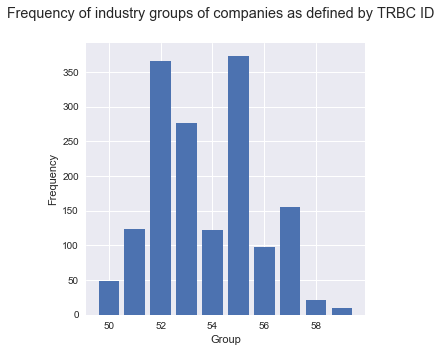

In [103]:
freq = np.asarray(HIDCluster.groupby(0).count()[1])
values = np.arange(50,60,1)
sns.set()
plt.figure(figsize = (5,5))
plt.bar(values, freq)
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.suptitle('Frequency of industry groups of companies as defined by TRBC ID')
plt.show()

In [ ]:
#alphaV = UIEQRIP816KZF5EW

finalData = np.zeros((1,3))

for cluster,x in np.asarray(HIDCluster.iloc[:,0:2].sample(frac=1)):
    name = x.split(' ', 1)[0]
    tickerLink = 'https://www.alphavantage.co/query?function=SYMBOL_SEARCH&keywords=' +name+'&apikey=CN075V3N9N2NOE67&datatype=csv'
    tickerDF = pd.read_csv(tickerLink)
    
    if len(tickerDF) != 0:
        ticker = tickerDF['symbol'][0]
        fDataLink1 = 'https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY_ADJUSTED&symbol='+ ticker +'&apikey=DYGYS6A7QAS49JAK&datatype=csv'
        financial = pd.read_csv(fDataLink1) 
        time.sleep(15)
        if len(financial) !=0:
            try:
                timestamp = financial['timestamp'][59-cluster]
                priceChange = (financial['close'][59-cluster]-financial['close'][60-cluster])/financial['close'][60-cluster]
                rowToAdd = np.asarray([str(cluster)[1],timestamp,priceChange])
                #finalData = np.append(finalData, rowToAdd)
                finalData = np.vstack((finalData,rowToAdd))
                print(rowToAdd)
                finalDataToWrite = pd.DataFrame(finalData)
                finalDataToWrite.to_csv('Final Data.csv',index=False)
            except KeyError:
                print('overload')
                time.sleep(30)
                pass
            
            
np.delete(finalData, 0, 0)
finalDataToWrite = pd.DataFrame(finalData)
finalData.to_csv('Final Data.csv',index=False)

['5' '2019-09-20' '-0.0110621309157']
overload
['2' '2019-08-30' '0.0369003690037']
overload
['4' '2019-09-13' '0.0652587519026']
['2' '2019-08-30' '-0.0108604845447']
overload
['7' '2019-10-04' '-0.0120788302606']
['3' '2019-09-06' '0.0']
overload
['2' '2019-08-30' '0.00770416024653']
['7' '2019-10-04' '0.0121457489879']
